<a href="https://colab.research.google.com/github/Brightson-Abraham/linear-regression-insurance/blob/main/LINEAR_REGRESSION_Insurance_Premium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
Insurance premiums are often based on various factors that in the end decide the amount that will be covered from the insurance company.
As a data analyst/scientist you are given a set of historical data for an organizations customers and the respective charges that were levied upon the insurance company.


The objective of proposed work is to predict the insurance charges of a person and
identify those patients with health insurance policy and medical details weather they
have any health issues or not.

The data gives you the information about the users including their age, sex, bmi, hospitalization history, annual income, etc. Analyze and gather insights fron the data and create a linear regression model that will best predict the insurance charges for a new set of data.

This kind of model is
useful for insurance
companies to determine
the yearly insurance
premium charges for a
person

In [ ]:
1.Import all the required libraries
2. DAta loading
3.. EDA - Exploratory Data Analysis -
i) Treating null values ii)Duplicate values iii)Outliers iv)Multicolliniarity (VIF)
4. Visulaize the data
5. Feature selection - x(independent features) y(dependent features)
6. Model creation

In [ ]:
#Import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#import the data
df = pd.read_csv("new_insurance_data (7).csv")
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [ ]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [ ]:
df.tail()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,170380500.5,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,201515184.8,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,223644981.3,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,252892382.6,3.0,4.006359e+09,southeast,62592.87309
1337,54.0,female,47.410,0.0,yes,63982.80926,31.0,1100328.0,261631699.3,3.0,4.117197e+09,southeast,63770.42801


In [ ]:
df.shape

(1338, 13)

In [ ]:
#basic info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [ ]:
#to check the presence of null values
df.isnull()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [ ]:
col = list(df.columns)

In [ ]:
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [ ]:
type(col)

list

In [ ]:
df['smoker'].mode()[0] #to check the mode of the data

'no'

In [ ]:
df['children'].mean()

1.0907726931732933

In [ ]:
df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [ ]:
#for dealing with the null values:
#1)df.dropna
#2)df.fillna(df['column_name'].mode())

In [ ]:
#df['Claim_Amount'] = df.fillna(df['Claim_Amount'].mean())

In [ ]:
for col_name in col:
    if df[col_name].dtypes == 'object':
        #print("object")
        df[col_name] = df[col_name].fillna(df[col_name].mode()[0])
    else:
        #print("numeric")
        df[col_name] = df[col_name].fillna(df[col_name].mean())

In [ ]:
df.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [ ]:
#object - mode
#numeric -> mean/median

In [ ]:
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [ ]:
#check dupliactes - drop duplicates

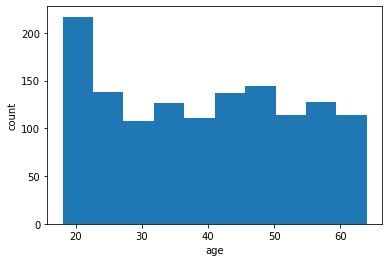

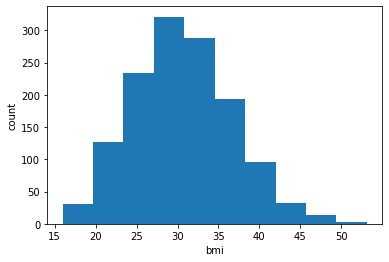

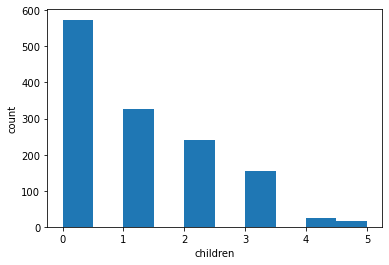

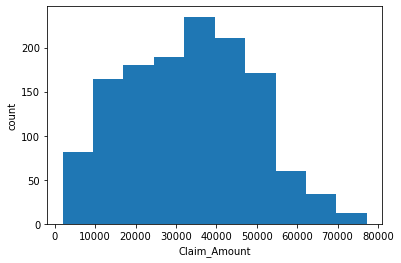

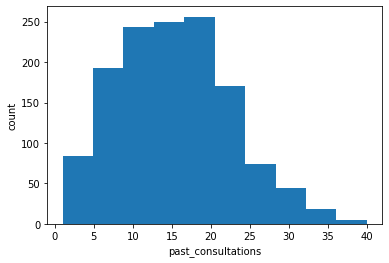

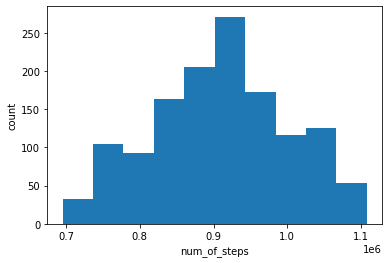

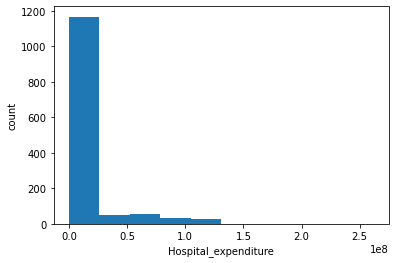

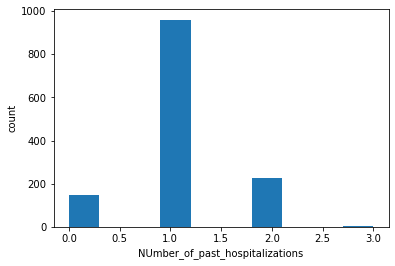

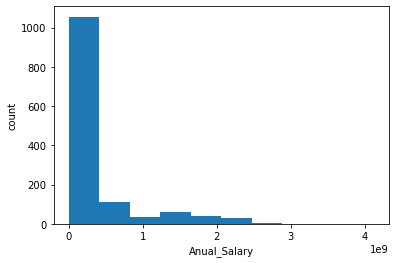

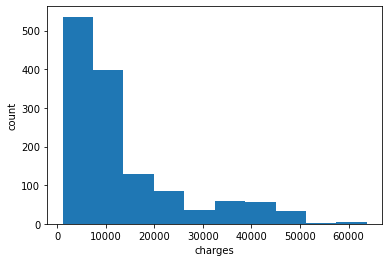

In [ ]:
for col_name in col:
    if(df[col_name].dtypes == 'int64' or df[col_name].dtypes=='float64'):
        plt.hist(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

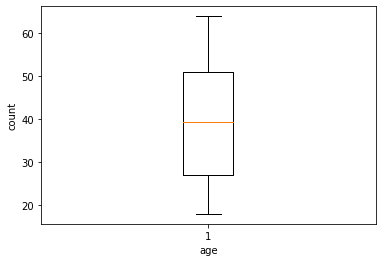

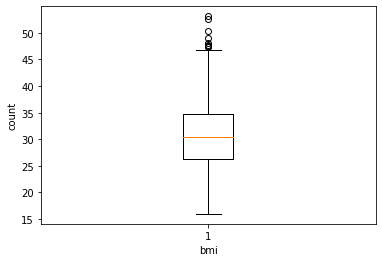

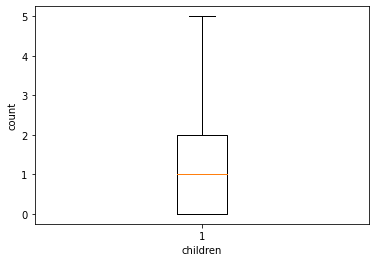

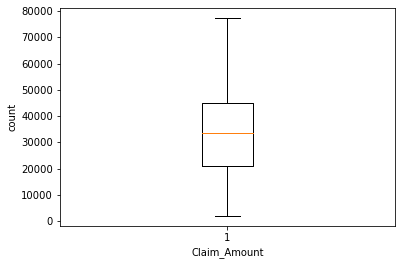

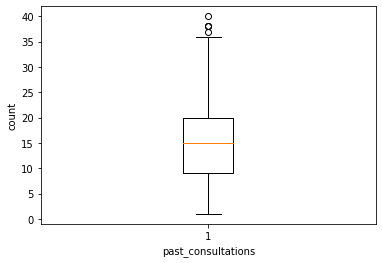

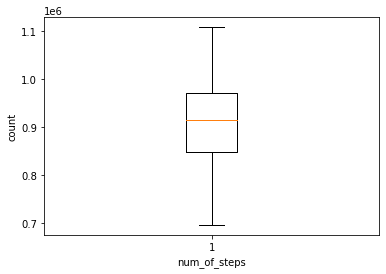

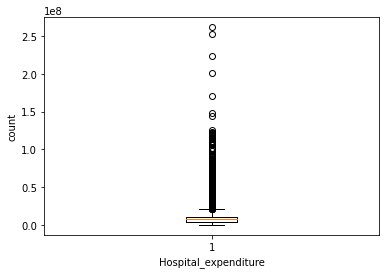

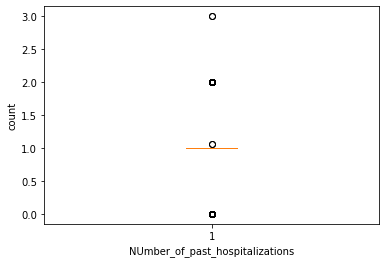

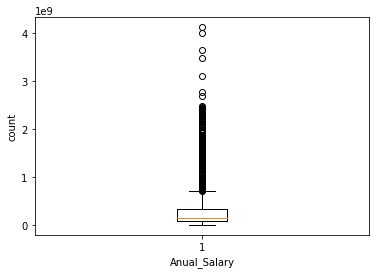

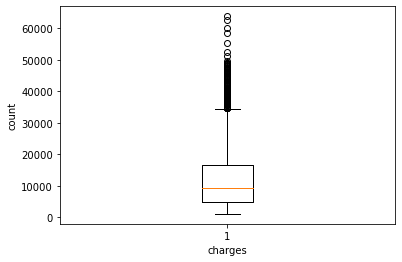

In [ ]:
for col_name in col:
    if(df[col_name].dtypes == 'int64' or df[col_name].dtypes=='float64'):
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [ ]:
#lower limit - Q1-1.5*IQR
#upper limit - Q3+1.5*IQR

In [ ]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)

In [ ]:
print(Q1,Q3)

26.315 34.65625


In [ ]:
IQR = Q3-Q1
IQR

8.341249999999999

In [ ]:
#lower limit
Q1-1.5*IQR

13.803125000000003

In [ ]:
#upper limit
Q3+1.5*IQR

47.168124999999996

In [ ]:
df = df[((df['bmi']>=Q1-1.5*IQR) & (df['bmi']<=Q3+1.5*IQR))]

In [ ]:
Q1 = df['past_consultations'].quantile(0.25)
Q3 = df['past_consultations'].quantile(0.75)

IQR = Q3-Q1

df = df[((df['past_consultations']>=Q1-1.5*IQR) & (df['past_consultations']<=Q3+1.5*IQR))]

Q1 = df['Hospital_expenditure'].quantile(0.25)
Q3 = df['Hospital_expenditure'].quantile(0.75)

IQR = Q3-Q1

df = df[((df['Hospital_expenditure']>=Q1-1.5*IQR) & (df['Hospital_expenditure']<=Q3+1.5*IQR))]

Q1 = df['Anual_Salary'].quantile(0.25)
Q3 = df['Anual_Salary'].quantile(0.75)

IQR = Q3-Q1

df = df[((df['Anual_Salary']>=Q1-1.5*IQR) & (df['Anual_Salary']<=Q3+1.5*IQR))]

In [ ]:
df.shape

(1025, 13)

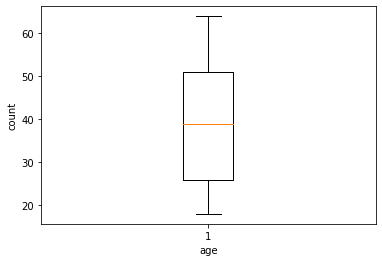

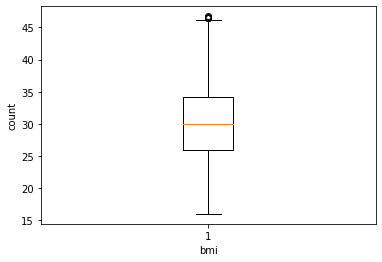

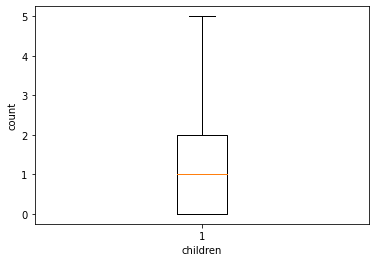

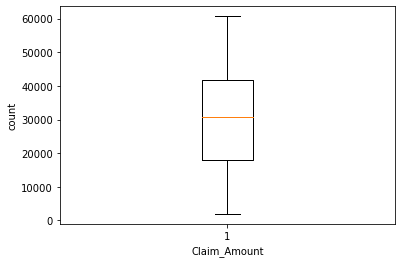

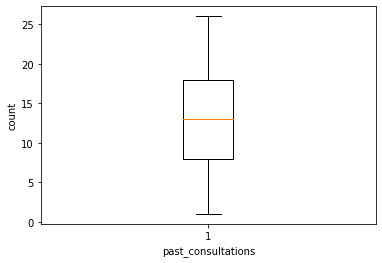

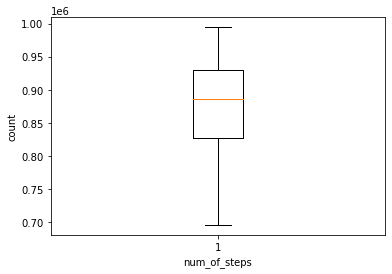

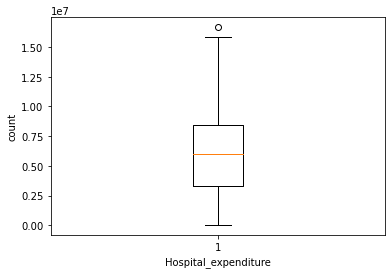

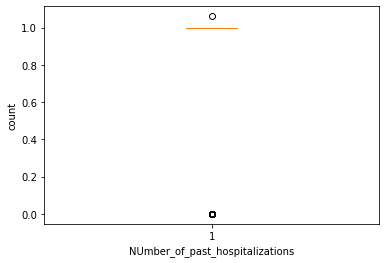

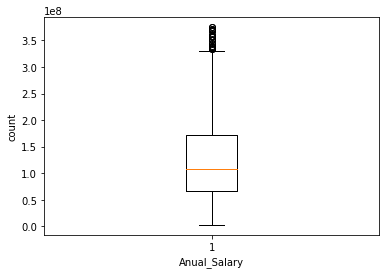

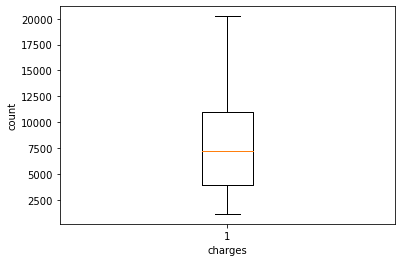

In [ ]:
#remove the outliers only for one time
for col_name in col:
    if(df[col_name].dtypes == 'int64' or df[col_name].dtypes=='float64'):
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [ ]:
#Multicollinearity

In [ ]:
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if((df[col].dtype!="object") & (col!='charges')): # only num cols expect target
        col_list.append(col)

In [ ]:
col_list

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary']

In [ ]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,24.0,female,27.600,0.0,no,27184.27803,9.0,980010.0,1.266673e+07,1.0,3.743228e+08,southwest,18955.22017
1046,29.0,female,27.940,1.0,yes,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,southeast,19107.77960
1050,31.0,male,29.810,0.0,yes,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,southeast,19350.36890
1062,43.0,female,20.045,2.0,yes,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08,northeast,19798.05455


In [ ]:
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if((df[col].dtype!="object") & (col!='charges')): # only num cols expect targe
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                           Feature        VIF
0                              age  15.843292
1                              bmi  26.254360
2                         children   2.029727
3                     Claim_Amount   5.658371
4               past_consultations   6.221689
5                     num_of_steps  61.238400
6             Hospital_expenditure   5.161339
7  NUmber_of_past_hospitalizations  12.002015
8                     Anual_Salary   5.595154


In [ ]:
df = df.drop(['num_of_steps'], axis=1)

In [ ]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...
1041,24.0,female,27.600,0.0,no,27184.27803,9.0,1.266673e+07,1.0,3.743228e+08,southwest,18955.22017
1046,29.0,female,27.940,1.0,yes,51168.25474,23.0,1.665982e+07,1.0,3.712188e+08,southeast,19107.77960
1050,31.0,male,29.810,0.0,yes,24382.58056,21.0,1.028991e+07,1.0,3.745310e+08,southeast,19350.36890
1062,43.0,female,20.045,2.0,yes,21596.43846,10.0,1.083030e+07,1.0,3.696849e+08,northeast,19798.05455


In [ ]:
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if((df[col].dtype!="object") & (col!='charges')): # only num cols expect targe
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                           Feature        VIF
0                              age  14.890043
1                              bmi  12.240954
2                         children   2.017735
3                     Claim_Amount   5.225668
4               past_consultations   5.807256
5             Hospital_expenditure   4.890602
6  NUmber_of_past_hospitalizations  10.644865
7                     Anual_Salary   5.493253


In [ ]:
df = df.drop(['age'], axis=1)

In [ ]:
df.shape

(1025, 11)

In [ ]:
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if((df[col].dtype!="object") & (col!='charges')): # only num cols expect targe
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                           Feature        VIF
0                              bmi  10.375579
1                         children   1.979830
2                     Claim_Amount   5.207453
3               past_consultations   5.786416
4             Hospital_expenditure   4.890598
5  NUmber_of_past_hospitalizations   8.310876
6                     Anual_Salary   4.729083


In [ ]:
df = df.drop(['bmi'], axis=1)

In [ ]:
df.shape

(1025, 10)

In [ ]:
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if((df[col].dtype!="object") & (col!='charges')): # only num cols expect targe
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                           Feature       VIF
0                         children  1.977411
1                     Claim_Amount  4.533417
2               past_consultations  5.015873
3             Hospital_expenditure  4.441670
4  NUmber_of_past_hospitalizations  7.301695
5                     Anual_Salary  4.705283


In [ ]:
df = df.drop(['NUmber_of_past_hospitalizations'], axis=1)

In [ ]:
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if((df[col].dtype!="object") & (col!='charges')): # only num cols expect targe
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                Feature       VIF
0              children  1.710679
1          Claim_Amount  4.154689
2    past_consultations  4.647220
3  Hospital_expenditure  4.264873
4          Anual_Salary  4.261439


In [ ]:
x = df.loc[:,['children','Claim_Amount','past_consultations','Hospital_expenditure','Anual_Salary']]
y = df.iloc[:,-1]

In [ ]:
#loc = column_name
#iloc = index number

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.9, random_state=34)

In [ ]:
x_train

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
638,1.0,27901.99388,20.0,4.411947e+06,1.374768e+08
1009,1.0,35909.40412,13.0,1.113678e+07,3.058401e+08
781,2.0,32452.33321,9.0,5.539770e+06,1.934937e+08
66,0.0,17975.32767,14.0,4.993491e+05,5.445941e+07
81,0.0,18968.94393,18.0,1.259409e+06,4.385989e+07
...,...,...,...,...,...
326,1.0,20289.87087,11.0,5.087206e+06,7.255715e+07
86,0.0,33199.89168,15.0,8.498848e+05,3.620603e+07
763,0.0,18094.64393,20.0,1.052415e+07,1.393229e+08
879,1.0,21185.01729,17.0,3.058305e+06,1.872166e+08


In [ ]:
y_test

309     4462.72180
304     4435.09420
570     8017.06115
590     8277.52300
976    14692.66935
          ...     
394     5425.02335
531     7345.08400
42      1639.56310
812    11538.42100
165     2709.11190
Name: charges, Length: 205, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
l_model = LinearRegression()  # LINEAR REGRESSION CLASS

In [ ]:
l_model.fit(x_train, y_train) # TRAINING OUR MODEL

LinearRegression()

In [ ]:
#predict
y_pred = l_model.predict(x_test)

In [ ]:
y_pred

array([ 6136.53960623,  5607.09024767,  7330.74726377,  6970.79103285,
       12963.41846912,  3768.10812527,  6303.52800032,  6859.72060677,
        3997.5712139 ,  8323.49978521, 13295.46037003,  1717.04465282,
        4184.59811679, 10527.70919715,  5552.40047196,  6935.56595793,
       11347.18647542,  7414.02429271,  3620.78683432, 12420.85970932,
        8160.82156175, 10284.90179683,  6019.93120824,  2709.43157972,
        7288.3996215 ,  7229.70699172,  8518.47388031,  5602.77427154,
        7379.50986043,  9682.42448071,  5333.70422809,  2216.10855576,
       12339.29547916,  3532.90885486,  3171.28551441,  2408.59823999,
        3073.47973207,  6291.82610977,  4246.6958852 ,  6361.30253716,
        9841.3983951 ,  1412.98408465,  2808.64718043,  4770.57005965,
        9573.19286613,  6715.25280026,  9455.18426655,  8936.34100338,
       12563.67496354,  9633.4924695 ,  6342.08530082,  2236.10130177,
       10414.09869597, 16918.29638089,  5079.37867219,  7780.22319867,
      

In [ ]:
error_pred = pd.DataFrame(columns = {'Actual_data', 'Prediction_data'})

In [ ]:
error_pred

,Actual_data,Prediction_data


In [ ]:
error_pred['Actual_data'] = y_test

In [ ]:
error_pred['Prediction_data'] = y_pred

In [ ]:
error_pred

,Actual_data,Prediction_data
309,4462.72180,6136.539606
304,4435.09420,5607.090248
570,8017.06115,7330.747264
590,8277.52300,6970.791033
976,14692.66935,12963.418469
...,...,...
394,5425.02335,5555.851325
531,7345.08400,8820.167354
42,1639.56310,3160.916167
812,11538.42100,9799.117928


In [ ]:
from sklearn.metrics import *

In [ ]:
accuracy = r2_score(y_test, y_pred)
accuracy

0.7253772988726754